#DA2
Twitter scrapping \
GUNA SHANKAR S \
20MIA1162

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Set search variables
search_words = "#example"
max_tweets = 1000
latitude = 37.7749
longitude = -122.4194
radius = "15km"

# Create a list to store tweet attributes
tweets_list = []

# Iterate through each tweet using the Twitter API
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_words + f" geocode:{latitude},{longitude},{radius}").get_items()):
    if i >= max_tweets:
        break
    tweets_list.append([tweet.date, tweet.content, tweet.user.username, tweet.user.location])

# Create a dataframe from the tweets list
tweets_df = pd.DataFrame(tweets_list, columns=["Date", "Text", "Username", "Location"])




<ipython-input-19-a7e33a999cea>:18: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.content, tweet.user.username, tweet.user.location])


In [ ]:
tweets_df.head(5)

,Date,Text,Username,Location
0,2023-02-28 01:04:53+00:00,When public media try to control your stock by...,XaevrM,San Francisco
1,2022-11-12 10:43:36+00:00,https://t.co/uoz6ruxqaw\n\nYour new producer.\...,GKhayut,796 Santiago St. 94116 SF 2022
2,2020-12-06 22:53:47+00:00,@ytquiroz So actually I think it could help ot...,relajoie,"Palo Alto, CA"
3,2019-11-02 01:10:15+00:00,According to my very #trusty #weather app @wun...,AdrianXTristan,"San Francisco, CA"
4,2018-12-04 20:32:24+00:00,@ADDerWORLD @FernandoandGreg @JasonDahlstedt #...,JulioFrank83,"San Francisco, Ca"


In [ ]:
# Save the dataframe as a CSV file
tweets_df.to_csv("tweets.csv", index=False)

In [ ]:
import pandas as pd

# Create a sample dataframe with datetime string

# Convert datetime string to pandas datetime format
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])

# Extract date, time, month, and year columns using pandas dt accessor
tweets_df['date'] = tweets_df['Date'].dt.date
tweets_df['time'] = tweets_df['Date'].dt.time
tweets_df['month'] = tweets_df['Date'].dt.month
tweets_df['year'] = tweets_df['Date'].dt.year

# Print the resulting dataframe
tweets_df.head(5)


,Date,Text,Username,Location,date,time,month,year
0,2023-02-28,When public media try to control your stock by...,XaevrM,San Francisco,2023-02-28,00:00:00,2,2023
1,2022-11-12,https://t.co/uoz6ruxqaw\n\nYour new producer.\...,GKhayut,796 Santiago St. 94116 SF 2022,2022-11-12,00:00:00,11,2022
2,2020-12-06,@ytquiroz So actually I think it could help ot...,relajoie,"Palo Alto, CA",2020-12-06,00:00:00,12,2020
3,2019-11-02,According to my very #trusty #weather app @wun...,AdrianXTristan,"San Francisco, CA",2019-11-02,00:00:00,11,2019
4,2018-12-04,@ADDerWORLD @FernandoandGreg @JasonDahlstedt #...,JulioFrank83,"San Francisco, Ca",2018-12-04,00:00:00,12,2018


In [ ]:
print(tweets_df['Text'])

0     When public media try to control your stock by...
1     https://t.co/uoz6ruxqaw\n\nYour new producer.\...
2     @ytquiroz So actually I think it could help ot...
3     According to my very #trusty #weather app @wun...
4     @ADDerWORLD @FernandoandGreg @JasonDahlstedt #...
5     One of the most important actions, things a le...
6     @JackShmidt2 this is a perfect #example of my ...
7     @realDonaldTrump #leadership by #example #auth...
8     @KatieUtehs @OUSDNews @Athletics Gotta #forgiv...
9     Don't tell your team that you are working on i...
10    One more #shocking #example of what #processed...
11    The #ACHA / #TrumpCare is a #prime #example of...
12    #example of collecting data, and research hist...
13    When #police is #example #howNOTtodo. #thanks ...
14    #example not #opinions 💯 @ Oakland, California...
15    That's an #example of #teamwork making the #dr...
16    @tonylowephoto I was looking at ur pics what i...
17    @sexystellax U R a great #example that #Ha

##Cleaning Text

In [ ]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove leading/trailing white space
    text = text.strip()
    
    return text

tweets_df['Clean Text'] = tweets_df['Text'].apply(clean_text)
tweets_df.head(5)

,Date,Text,Username,Location,Clean Text
0,2023-02-28,When public media try to control your stock by...,XaevrM,San Francisco,when public media try to control your stock by...
1,2022-11-12,https://t.co/uoz6ruxqaw\n\nYour new producer.\...,GKhayut,796 Santiago St. 94116 SF 2022,your new producer\n\nиыыыыгорь\n\nsurrender th...
2,2020-12-06,@ytquiroz So actually I think it could help ot...,relajoie,"Palo Alto, CA",so actually i think it could help others to se...
3,2019-11-02,According to my very #trusty #weather app @wun...,AdrianXTristan,"San Francisco, CA",according to my very app it felt like deg...
4,2018-12-04,@ADDerWORLD @FernandoandGreg @JasonDahlstedt #...,JulioFrank83,"San Francisco, Ca",funny how things happen unexpectedly and we do...


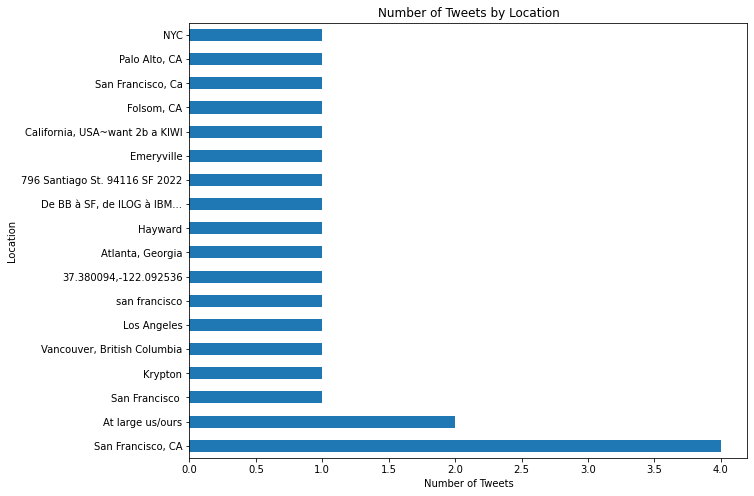

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the tweets data from the CSV file


# Count the number of tweets from each location
location_counts = tweets_df['Location'].value_counts()

# Plot a horizontal bar chart of the location counts
location_counts.plot(kind='barh', figsize=(10,8))

# Set the chart title and axis labels
plt.title('Number of Tweets by Location')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')

# Show the chart
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


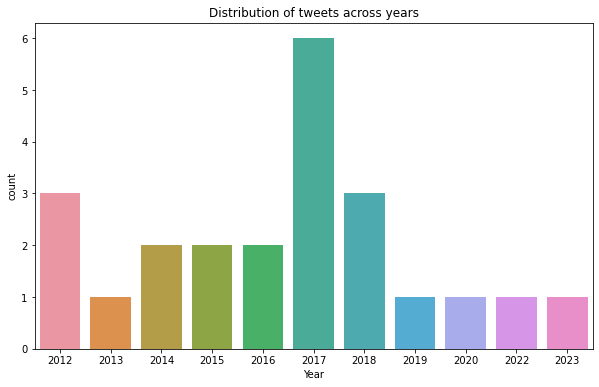

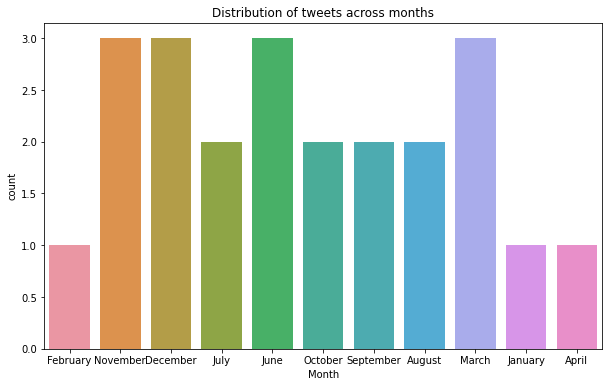

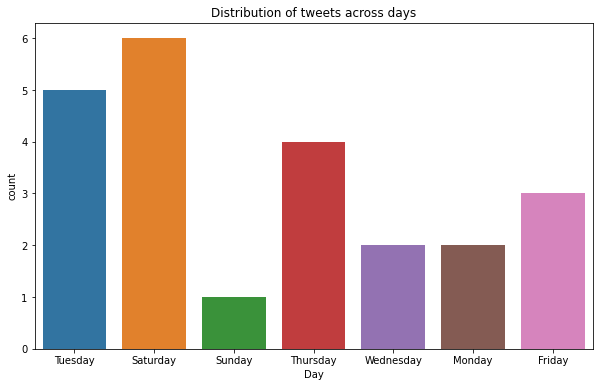

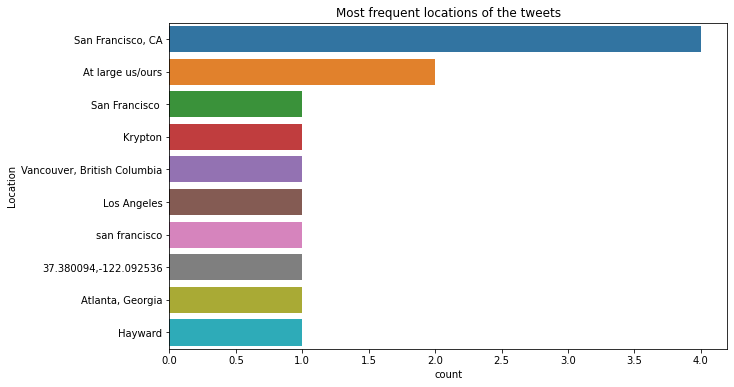

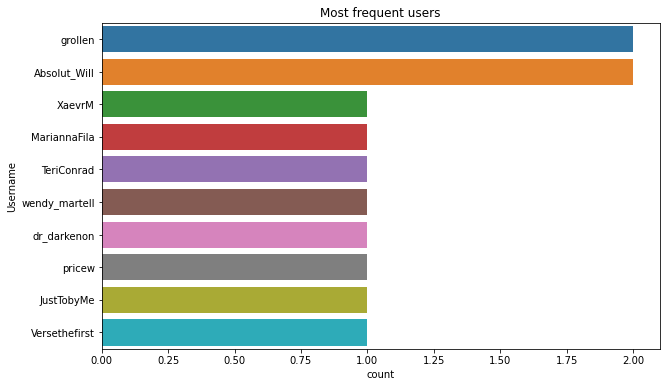

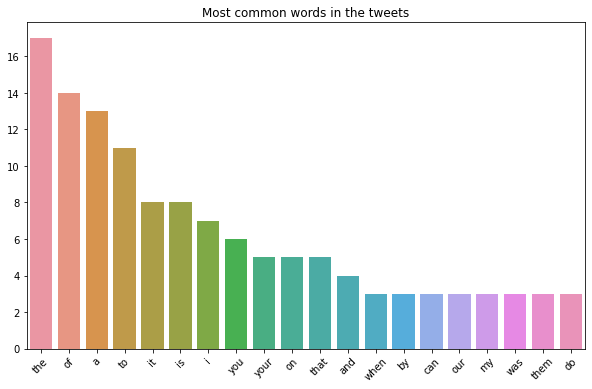

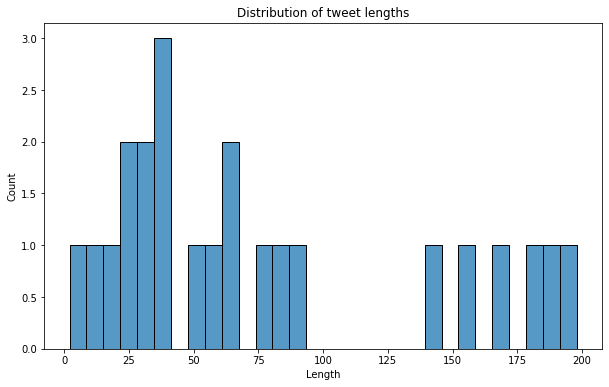

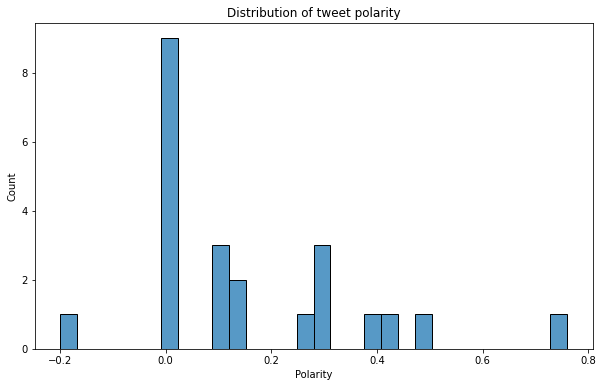

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob
import nltk
nltk.download('punkt')


# Load the data into a pandas dataframe
df = pd.read_csv('tweets.csv')

# Check the distribution of tweets across time
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

# Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of tweets across years')
plt.show()

# Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Distribution of tweets across months')
plt.show()

# Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', data=df)
plt.title('Distribution of tweets across days')
plt.show()

# Check the most frequent locations of the tweets and the users
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().iloc[:10].index)
plt.title('Most frequent locations of the tweets')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Username', data=df, order=df['Username'].value_counts().iloc[:10].index)
plt.title('Most frequent users')
plt.show()

import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove leading/trailing white space
    text = text.strip()
    
    return text

df['Clean Text'] = df['Text'].apply(clean_text)
df.head(5)

# Check the most common words used in the tweets
tokens = []
for text in df['Clean Text']:
    tokens.extend(word_tokenize(text.lower()))

word_counts = Counter(tokens)
common_words = dict(word_counts.most_common(20))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(common_words.keys()), y=list(common_words.values()))
plt.title('Most common words in the tweets')
plt.xticks(rotation=45)
plt.show()

# Check the distribution of tweet lengths
df['Length'] = df['Clean Text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.histplot(x='Length', data=df, bins=30)
plt.title('Distribution of tweet lengths')
plt.show()

# Check the most mentioned users and hashtags
hashtags = []
mentions = []

for text in df['Clean Text']:
    tokens = word_tokenize(text)
    hashtags.extend([token[1:] for token in tokens if token.startswith('#')])
    mentions.extend([token[1:] for token in tokens if token.startswith('@')])



# Check the sentiment of the tweets
polarity = []
subjectivity = []
for text in df['Clean Text']:
    blob = TextBlob(text)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

df['Polarity'] = polarity
df['Subjectivity'] = subjectivity

plt.figure(figsize=(10, 6))
sns.histplot(x='Polarity', data=df, bins=30)
plt.title('Distribution of tweet polarity')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob

# Load the data into a pandas dataframe
df = pd.read_csv('tweets.csv')

# Print the first few rows of the dataframe
print(df.head())

# Define a function to clean the text of each tweet
def clean_text(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any mentions of usernames
    text = re.sub(r'@\S+', '', text)
    # Remove any hashtags
    text = re.sub(r'#\S+', '', text)
    # Remove any punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove any numbers
    text = re.sub(r'\d+', '', text)
    # Remove any extra whitespace
    text = text.strip()
    return text

# Apply the clean_text function to the 'text' column of the dataframe
df['Clean Text'] = df['Text'].apply(clean_text)

# Create a list of all hashtags and mentions in the tweets
hashtags = []
mentions = []
for text in df['Clean Text']:
    # Use regular expressions to find all hashtags and mentions in the text
    hashtags += re.findall(r'#\S+', text)
    mentions += re.findall(r'@\S+', text)

         Date                                               Text  \
0  2023-02-28  When public media try to control your stock by...   
1  2022-11-12  https://t.co/uoz6ruxqaw\n\nYour new producer.\...   
2  2020-12-06  @ytquiroz So actually I think it could help ot...   
3  2019-11-02  According to my very #trusty #weather app @wun...   
4  2018-12-04  @ADDerWORLD @FernandoandGreg @JasonDahlstedt #...   

         Username                        Location  
0          XaevrM                  San Francisco   
1         GKhayut  796 Santiago St. 94116 SF 2022  
2        relajoie                   Palo Alto, CA  
3  AdrianXTristan               San Francisco, CA  
4    JulioFrank83               San Francisco, Ca  


{}

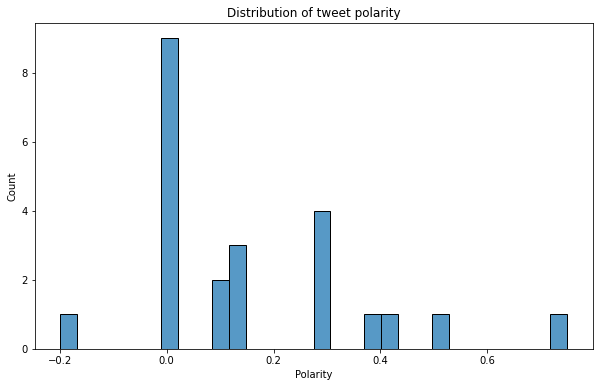

In [ ]:
# Calculate the polarity and subjectivity of each tweet using TextBlob
polarity = []
subjectivity = []
for text in df['Clean Text']:
    blob = TextBlob(text)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

# Add the polarity and subjectivity columns to the dataframe
df['Polarity'] = polarity
df['Subjectivity'] = subjectivity

# Plot a histogram of the tweet polarities
plt.figure(figsize=(10, 6))
sns.histplot(x='Polarity', data=df, bins=30)
plt.title('Distribution of tweet polarity')
plt.show()
